In [51]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pylab as plt

In [29]:
df = pd.read_csv("results.csv")
df

,actor,movie_or_TV_name
0,Chris Pattinson,The Matrix
1,Bernard Ledger,The 7th Hunt
2,Bernard Ledger,No Escape
3,Bernard Ledger,Frauds
4,Bernard Ledger,Sweetie
...,...,...
1101,Marc Aden Gray,Water Rats
1102,Marc Aden Gray,Blue Heelers
1103,Marc Aden Gray,Flirting
1104,Marc Aden Gray,High Tide


In [30]:
df["actor"].unique()

array(['Chris Pattinson', 'Bernard Ledger', 'Michael Butcher',
       'Lawrence Woodward', 'Luke Quinton', 'Steve Dodd',
       'Harry Lawrence', 'Fiona Johnson', 'Jeremy Ball', "David O'Connor",
       'Bill Young', 'Natalie Tjen', 'Adryn White', 'Janaya Pender',
       'Eleanor Witt', 'Rowan Witt', 'Tamara Brown', 'Rana Morrison',
       'Nigel Harbach', 'Robert Simper', 'Deni Gordon', 'David Aston',
       'Julian Arahanga', 'Ada Nicodemou', 'Robert Taylor',
       'Paul Goddard', 'Belinda McClory', 'Gloria Foster', 'Matt Doran',
       'Anthony Ray Parker', 'Marcus Chong', 'Joe Pantoliano',
       'Hugo Weaving', 'Carrie-Anne Moss', 'Laurence Fishburne',
       'Keanu Reeves', 'Marc Aden Gray'], dtype=object)

In [31]:
conn = sqlite3.connect("act.db")

In [32]:
df.to_sql("act", conn, index=False)

ValueError: Table 'act' already exists.

In [33]:
cursor = conn.cursor() # get a cursor object from the database connection
cursor

In [34]:
cmd = \
    """
    SELECT movie_or_TV_name AS movie_name, 
        COUNT(DISTINCT actor) as number_of_actors, 
        REPLACE(GROUP_CONCAT(DISTINCT actor), ",", ", ") as actors_in_movie
    FROM act
    GROUP BY movie_or_TV_name
    ORDER BY number_of_actors DESC
    """

rec = pd.read_sql_query(cmd, conn)
rec

,movie_name,number_of_actors,actors_in_movie
0,The Matrix,32,"Paul Goddard, Belinda McClory, Gloria Foster, ..."
1,Police Rescue,7,"Robert Simper, Michael Butcher, Lawrence Woodw..."
2,The Matrix Reloaded,6,"Gloria Foster, Hugo Weaving, Carrie-Anne Moss,..."
3,The View,5,"Joe Pantoliano, Hugo Weaving, Carrie-Anne Moss..."
4,Making 'The Matrix',5,"Joe Pantoliano, Hugo Weaving, Carrie-Anne Moss..."
...,...,...,...
851,2099: The Soldier Protocol,1,Belinda McClory
852,19-2,1,Tamara Brown
853,...So Goes the Nation,1,Joe Pantoliano
854,...Maybe This Time,1,Hugo Weaving


In [48]:
rec1 = rec.head(10)
rec1 = rec1.drop("actors_in_movie", axis=1)
rec1

,movie_name,number_of_actors
0,The Matrix,32
1,Police Rescue,7
2,The Matrix Reloaded,6
3,The View,5
4,Making 'The Matrix',5
5,The Matrix Revolutions Revisited,4
6,The Matrix Revolutions,4
7,The Matrix Revisited,4
8,The Matrix Reloaded: Pre-Load,4
9,The Matrix Reloaded Revisited,4


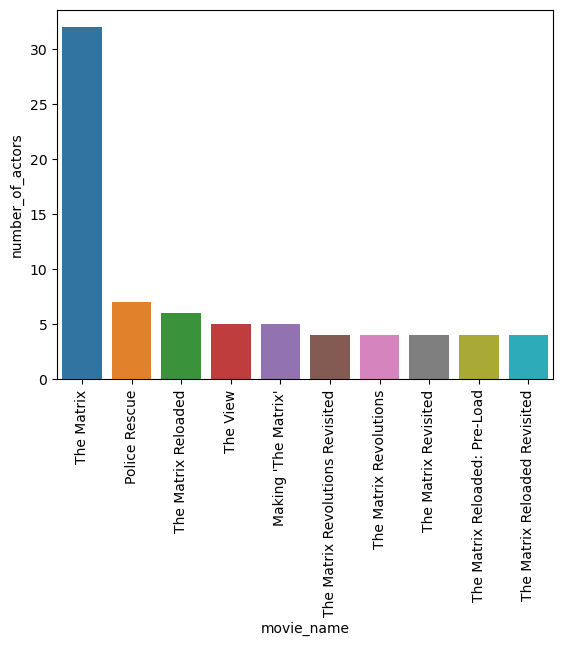

In [53]:
sns.barplot(data=rec1, x="movie_name", y="number_of_actors")
plt.xticks(rotation=90)
plt.show()